<img src = "https://drive.google.com/uc?export=view&id=1HYrQHu1AE2cEid3BpNxo5KK3tuZF1TCo" alt = "Encabezado MLDS" width = "100%">  </img>

# **Análisis de datos**
---

Este notebook es una plantilla que le puede servir como guía para el cuarto entregable del proyecto aplicado.

In [124]:
!pip install lifelines

In [125]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from lifelines import KaplanMeierFitter
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
data = pd.read_csv('/content/drive/MyDrive/Proyecto Aplicado MLDS/clean_clinal_dset.csv')
pd.set_option('display.max_columns', None)
data.head()

,patient_nbr,race,age,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,diag_1,diag_2,diag_3,number_diagnoses,insulin,change,diabetesMed,readmitted,gender,discharge_disposition_id
0,8222157,Caucasian,[0-10),6,1,1,41,0,1,0,250.83,NaN,NaN,1,No,No,No,NO,Female,25
1,55629189,Caucasian,[10-20),1,7,3,59,0,18,0,276,250.01,255,9,Up,Ch,Yes,>30,Female,1
2,86047875,AfricanAmerican,[20-30),1,7,2,11,5,13,2,648,250,V27,6,No,No,Yes,NO,Female,1
3,82442376,Caucasian,[30-40),1,7,2,44,1,16,0,8,250.43,403,7,Up,Ch,Yes,NO,Male,1
4,42519267,Caucasian,[40-50),1,7,1,51,0,8,0,197,157,250,5,Steady,Ch,Yes,NO,Male,1


In [128]:
data.describe()

,patient_nbr,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_diagnoses,discharge_disposition_id
count,1.017630e+05,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,5.432965e+07,2.024017,5.754459,4.396018,43.095909,1.339691,16.021835,0.369368,7.422649,3.715515
std,3.869658e+07,1.445414,4.064110,2.985092,19.674220,1.705792,8.127589,1.267282,1.933578,5.279919
min,1.350000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,2.341296e+07,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,6.000000,1.000000
50%,4.550049e+07,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,8.000000,1.000000
75%,8.754571e+07,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,9.000000,4.000000
max,1.895026e+08,8.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,16.000000,28.000000


## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. Cristhian Enrique Córdoba Trillos
2. Laura Daniela Zambrano Guacheta

## **1. Análisis y resultados**
---

Al adentrarse en el análisis de datos, es crucial adoptar un enfoque estratégico que responda a las preguntas de planteadas en el proyecto. La selección de variables para estudio requiere una evaluación cuidadosa de los objetivos específicos del proyecto, priorizando aquellas que se consideren fundamentales para obtener resultados significativos.

A lo largo de esta entrega, trate busque responder las siguientes preguntas

- ¿Cómo se aplicaron conceptos específicos de estadística descriptiva e inferencial en el análisis de datos y cuál fue el enfoque utilizado para interpretar los resultados de manera precisa?
- ¿Cómo se interpretaron los resultados de la estadística descriptiva y qué conclusiones se pueden extraer?
- ¿Cómo se relacionan los resultados del análisis de datos con los objetivos y preguntas planteadas inicialmente?
- ¿Qué implicaciones prácticas tienen los hallazgos y cómo podrían influir en la toma de decisiones?

### **1.1. Análisis de correlaciones**
---

- Analice la posible existencia de relaciones entre las variables, utilizando medidas de correlación o visualizaciones pertinentes.
- Detecte la presencia de redundancias entre las variables, con el objetivo de facilitar su posterior eliminación o selección en el análisis.
- ¿Cuáles fueron las variables seleccionadas para el análisis de correlaciones, y cómo se eligieron en función de los objetivos del proyecto?


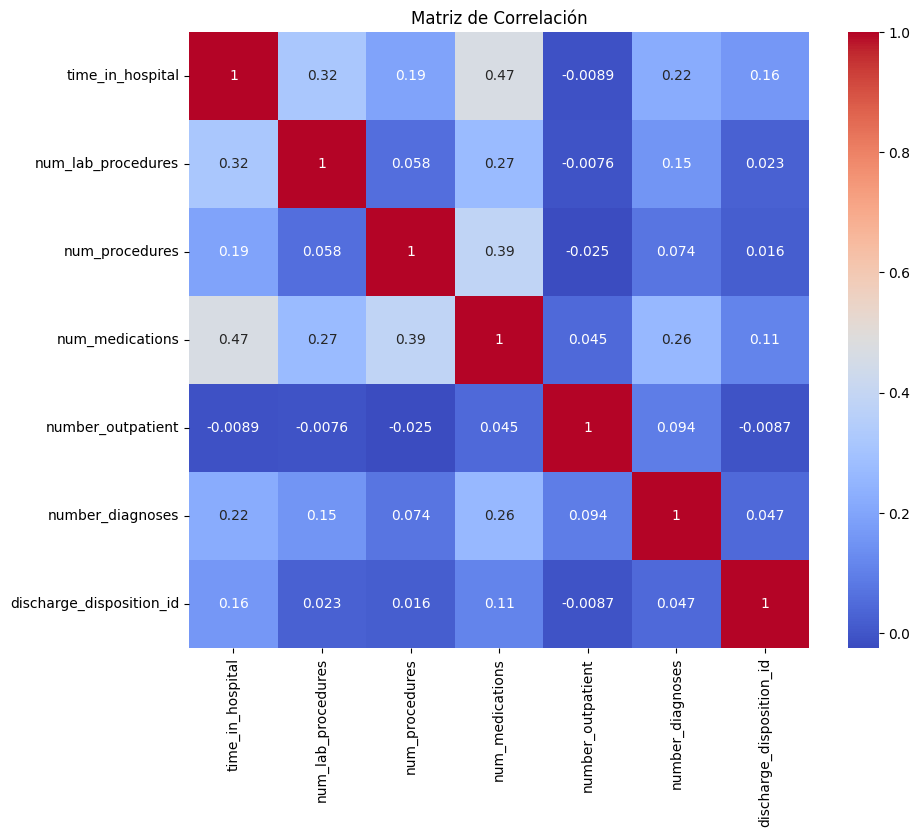

In [129]:
numeric = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_diagnoses', 'discharge_disposition_id']
numeric_data = data[numeric]

corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


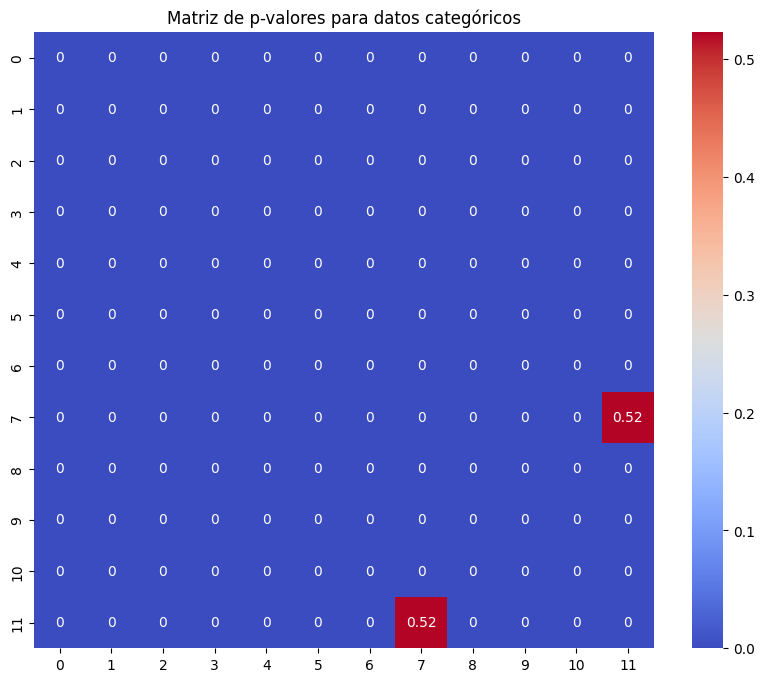

In [130]:
categorical = ['race', 'age', 'admission_type_id','admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'insulin', 'change', 'diabetesMed', 'readmitted', 'gender']
categorical_data = data[categorical]


corr = np.zeros((len(categorical), len(categorical)))


for i in range(len(categorical)):
    for j in range(len(categorical)):
        column_a, column_b = categorical_data[categorical[i]], categorical_data[categorical[j]]
        cross_tab = pd.crosstab(index=column_a, columns=column_b)
        chi_sq_result = chi2_contingency(cross_tab)
        corr[i, j] = chi_sq_result[1]  # Obtener el p-valor

plt.figure(figsize=(10, 8))
sns.heatmap(corr * (corr > 0.05 / len(categorical)), annot=True, cmap='coolwarm')
plt.title('Matriz de p-valores para datos categóricos')
plt.show()



In [131]:
one_hot_categorical = ['insulin','age','race','change','diabetesMed','gender']
label_categorical = ['readmitted']
non_transform = ['time_in_hospital', 'number_diagnoses', 'num_lab_procedures', 'num_procedures', 'num_medications','patient_nbr','number_outpatient','discharge_disposition_id']

adapted_data = pd.DataFrame()

adapted_data[non_transform] = data[non_transform]

adapted_data[label_categorical] = data[label_categorical].replace({'NO': 0, '<30': 1, '>30': 1,})

for column_name in one_hot_categorical:
    one_hot_column = pd.get_dummies(data[column_name], prefix=column_name)
    columns, values = np.array(one_hot_column.columns), np.array(one_hot_column.sum())
    one_hot_column = one_hot_column.drop(columns=columns[values == np.max(values)])
    adapted_data[one_hot_column.columns] = one_hot_column

adapted_data['insulin_Down'] = data['insulin'].replace({'Down': 1, 'Up': 0, 'Steady': 0,'No':0})
adapted_data['insulin_Up'] = data['insulin'].replace({'Up': 1, 'Down': 0, 'Steady': 0,'No':0})
adapted_data['insulin_Steady'] = data['insulin'].replace({'Steady': 1, 'Down': 0, 'Up': 0,'No':0})

columns_to_replace = ['age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
                      'age_[50-60)', 'age_[60-70)', 'age_[80-90)', 'age_[90-100)', 'race_AfricanAmerican',
                      'race_Asian', 'race_Hispanic', 'race_Other/Unknown', 'change_Ch',
                      'diabetesMed_No', 'gender_Male']

# Reemplazar True/False por 1/0
adapted_data[columns_to_replace] = adapted_data[columns_to_replace].astype(int)

adapted_data.head()


,time_in_hospital,number_diagnoses,num_lab_procedures,num_procedures,num_medications,patient_nbr,number_outpatient,discharge_disposition_id,readmitted,insulin_Down,insulin_Steady,insulin_Up,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[80-90),age_[90-100),race_AfricanAmerican,race_Asian,race_Hispanic,race_Other/Unknown,change_Ch,diabetesMed_No,gender_Male
0,1,1,41,0,1,8222157,0,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,9,59,0,18,55629189,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,6,11,5,13,86047875,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,7,44,1,16,82442376,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,1,5,51,0,8,42519267,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [132]:
adapted_data.columns

Index(['time_in_hospital', 'number_diagnoses', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'patient_nbr', 'number_outpatient',
       'discharge_disposition_id', 'readmitted', 'insulin_Down',
       'insulin_Steady', 'insulin_Up', 'age_[0-10)', 'age_[10-20)',
       'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)',
       'age_[60-70)', 'age_[80-90)', 'age_[90-100)', 'race_AfricanAmerican',
       'race_Asian', 'race_Hispanic', 'race_Other/Unknown', 'change_Ch',
       'diabetesMed_No', 'gender_Male'],
      dtype='object')

1. Relaciones entre variables:

  El análisis de correlación muestra relaciones entre débiles y moderadas entre sí. Por ejemplo, time_in_hospital tiene una correlación moderada con num_medications (0.47), lo que sugiere que los pacientes que pasan más tiempo en el hospital tienden a recibir más medicamentos. También se observa una relación moderada entre num_procedures y num_medications (0.39), lo que indica que a más procedimientos, más medicamentos se administran. Variables como number_outpatient no muestran correlaciones significativas con otras, sugiriendo que esta variable no tiene una relación lineal con ninguna otra de la base.

2. Redundancias entre variables:

  No se encontraron redundancias entre las variables numéricas, ya que no hay ningun coeficiente de correlación arriba de 0.8 como para considerarlo. Al contrario vemos que las relaciones son bajas, con la variable variable number_outpatient como la variable menos correlacionada con las demás en la base.
  
  Para las variables categóricas, las pruebas de chi-cuadrado muestran que algunas categorías como las de edad y el estado de insulin pueden estar relacionadas, pero no se identificaron altos niveles de correlación.

3. Selección de variables:

  Las variables seleccionadas para el análisis de correlación incluyen tanto variables numéricas (time_in_hospital, num_lab_procedures, num_medications, entre otras) como categóricas (readmitted, insulin, y categorías de edad). Las pruebas estadísticas realizadas ayudan a identificar las relaciones más relevantes para el análisis posterior.

### **1.2. Análisis de regresiones**
---

- Apartir de las correlaciones identificadas, ¿es posible llevar a cabo un análisis de regresiones para estimar el valor de alguna de las variables de interés?
- ¿Cuáles fueron las variables seleccionadas para el análisis de regresiones y cómo se eligieron en función de los objetivos del proyecto?


In [133]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(adapted_data, duration_col='time_in_hospital', event_col='readmitted')
print(f'C-index: {cph.concordance_index_}')

C-index: 0.6755368308688096


**Análisis de regresión lineal**

In [134]:
X = adapted_data[['num_lab_procedures',  'number_diagnoses','discharge_disposition_id','time_in_hospital']]
y = adapted_data['readmitted']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             readmitted   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     366.9
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          3.10e-314
Time:                        04:54:53   Log-Likelihood:                -72818.
No. Observations:              101763   AIC:                         1.456e+05
Df Residuals:                  101758   BIC:                         1.457e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [135]:
X = adapted_data[['num_lab_procedures', 'num_medications', 'number_diagnoses','discharge_disposition_id','readmitted']]
y = adapted_data['time_in_hospital']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       time_in_hospital   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     7821.
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        04:54:53   Log-Likelihood:            -2.3914e+05
No. Observations:              101763   AIC:                         4.783e+05
Df Residuals:                  101757   BIC:                         4.783e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

A partir de las correlaciones identificadas, es posible llevar a cabo un análisis de regresión para estimar el valor de variables de interés como el tiempo de hospitalización y la readmisión de pacientes. Este tipo de análisis permite evaluar la relación entre una variable dependiente y una o más variables independientes, ayudando a entender cómo influyen estas últimas en la primera. En este caso, el análisis se centrará en cómo el tiempo en el hospital, y la posibilidad de ser o no readmitido en el hospital es influenciado por diversas variables externas.

La selección de estas variables se basó en los objetivos del proyecto, que buscan comprender los factores que afectan tanto el tiempo de hospitalización como la readmisión de pacientes. Se priorizaron aquellas variables que mostraron correlaciones significativas en análisis previos, lo que permitirá establecer un modelo que facilite la estimación del tiempo de hospitalización y la readmisión basado en información clínica relevante.

Los resultados del análisis de regresión muestran que todas las variables seleccionadas tienen un impacto significativo en el tiempo de hospitalización y readmisión. El modelo reveló que el número de procedimientos realizados, la cantidad de medicamentos administrados, y el número de diagnósticos están positivamente correlacionados con el tiempo que los pacientes pasan en el hospital, lo que indica que a medida que aumenta cualquiera de estas variables, también lo hace el tiempo de hospitalización. Estos hallazgos destacan la importancia de considerar estos factores al gestionar la atención hospitalaria y al desarrollar estrategias para reducir el tiempo de estancia y las tasas de readmisión.

Por último, el RCuadrado del modelo de estimación de la posibilidad de ser readmitido es varias veces más pequeño que el RCuadrado del modelo de pronóstico de tiempo en el hospital. Así, el modelo de pronóstico de tiempo en el hospital logra explicarse mejor a partir de las variables de No. de procedimientos, No. de medicamentos, No. de diagnósticos, cargo a la disposición y si este es readmitido o no.

### **1.3. Estadística inferencial (Opcional)**
---

- ¿Resulta pertinente calcular intervalos de confianza para estimar algún parámetro con confianza a partir de una muestra?
- ¿Es posible realizar pruebas de hipótesis para probar alguna teoría sobre un parámetro de la población?

In [136]:
report = cph.summary
report['relevant'] = report['p'] < (0.05/len(adapted_data.columns))
report

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p),relevant
covariate,,,,,,,,,,,,
number_diagnoses,2.820664e-03,1.002825,2.817080e-03,-2.700711e-03,8.342038e-03,0.997303,1.008377,0.0,1.001272,3.166952e-01,1.658833,False
num_lab_procedures,-7.680264e-03,0.992349,2.376634e-04,-8.146076e-03,-7.214453e-03,0.991887,0.992812,0.0,-32.315728,4.206207e-229,758.649014,True
num_procedures,-6.470847e-02,0.937341,3.166240e-03,-7.091419e-02,-5.850276e-02,0.931542,0.943176,0.0,-20.437011,7.839636e-93,305.968526,True
num_medications,-4.010223e-02,0.960691,7.515129e-04,-4.157517e-02,-3.862929e-02,0.959277,0.962107,0.0,-53.361999,0.000000e+00,inf,True
patient_nbr,2.463125e-09,1.000000,1.235497e-10,2.220972e-09,2.705278e-09,1.000000,1.000000,0.0,19.936310,1.970791e-88,291.350897,True
number_outpatient,5.941959e-02,1.061220,2.427834e-03,5.466112e-02,6.417806e-02,1.056183,1.066282,0.0,24.474318,2.773262e-132,437.022924,True
discharge_disposition_id,-2.440118e-02,0.975894,1.000669e-03,-2.636246e-02,-2.243991e-02,0.973982,0.977810,0.0,-24.384880,2.474469e-131,433.865462,True
insulin_Down,1.030619e-01,1.108560,1.790548e-02,6.796784e-02,1.381560e-01,1.070331,1.148155,0.0,5.755888,8.618749e-09,26.789874,True
insulin_Steady,-2.465527e-02,0.975646,1.287260e-02,-4.988510e-02,5.745643e-04,0.951339,1.000575,0.0,-1.915329,5.545052e-02,4.172655,False


En este caso, se utilizó el valor p para determinar la relevancia de cada variable en el modelo. Al aplicar un umbral de significancia ajustado, se identificaron las variables que tienen un efecto estadísticamente significativo sobre la probabilidad de readmisión. El reporte final muestra que ciertas variables, como el número de procedimientos y las medicaciones, son relevantes según los resultados del análisis, proporcionando evidencia para rechazar la hipótesis nula en favor de una relación significativa entre estas variables y la readmisión o el tiempo en hospital. Este enfoque abre la posibilidad a evaluar un modelo donde se incluyan todas estas variables que ofrecen un impacto verdadero sobre la variable de readmisión.

## **2. Resultados y visualizaciones**

### **2.1. Visualizaciones Estáticas**
---

* Incluya gráficos y visualizaciones estáticas que sean relevantes para los datos analizados.
* Explique cada visualización y cómo contribuye a la comprensión de los resultados.

In [137]:
results = pd.DataFrame()
results['id'] = data['patient_nbr']
results['status'] = data['readmitted']
results['hazard'] = np.log(cph.predict_partial_hazard(adapted_data))

<Axes: title={'center': 'hazard'}, xlabel='status'>

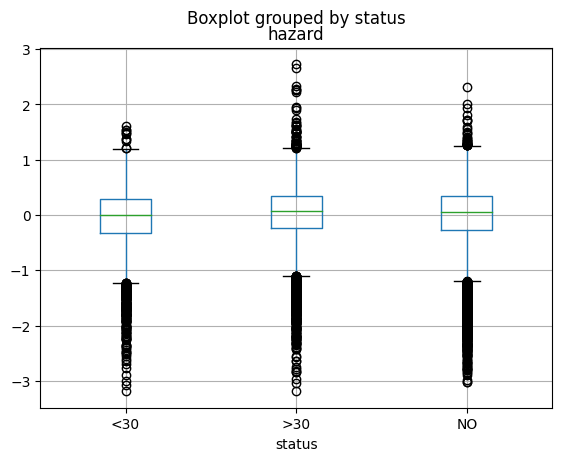

In [138]:
results.boxplot(column='hazard', by='status')

La gráfica de boxplot muestra la distribución del hazard en función del estado de readmisión de los pacientes, separando aquellos que fueron readmitidos de los que no. Cada caja representa el rango intercuartílico del hazard, con líneas que indican la mediana, lo que permite observar la diferencia en riesgo entre los grupos. Esta visualización es útil para identificar tendencias y patrones en el riesgo, lo que puede informar decisiones clínicas y estrategias de intervención, además de resaltar casos atípicos que merecen un análisis más detallado para comprender mejor las causas de la readmisión.

Los outliers pueden indicar pacientes con un riesgo de readmisión significativamente diferente al de la mayoría de los demás. En este contexto, los outliers podrían ser pacientes que, a pesar de tener un tiempo de hospitalización similar al de otros, presentan un hazard mucho más alto o más bajo, sugiriendo que hay factores adicionales que afectan su riesgo de readmisión.

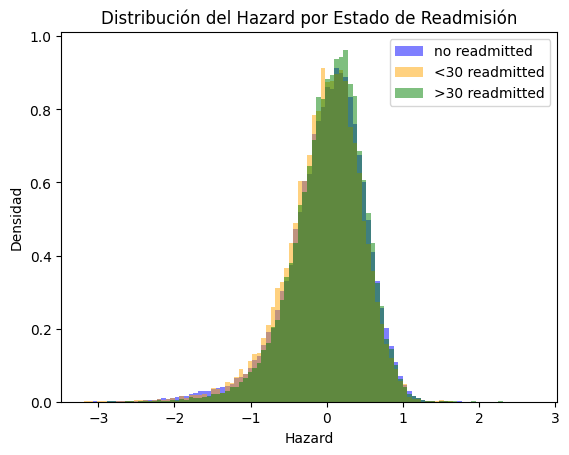

In [139]:
min_hazard = results['hazard'].min()
max_hazard = results['hazard'].max()

bins = np.linspace(min_hazard, max_hazard, 100)

plt.hist(results[results['status'] == 'NO']['hazard'], bins, alpha=0.5, color='blue', label='no readmitted', density=True)
plt.hist(results[results['status'] == '<30']['hazard'], bins, alpha=0.5, color='orange', label='<30 readmitted', density=True)
plt.hist(results[results['status'] == '>30']['hazard'], bins, alpha=0.5, color='green', label='>30 readmitted', density=True)

plt.legend(loc='upper right')
plt.title('Distribución del Hazard por Estado de Readmisión')
plt.xlabel('Hazard')
plt.ylabel('Densidad')
plt.show()


En el histograma que se presenta, se observa la distribución del hazard de los pacientes según su estado de readmisión, clasificados en tres categorías: **"no readmitted"**, **"<30"**, y **">30"**. La visualización de la distribución del hazard es fundamental para entender cómo se agrupan los riesgos de readmisión entre diferentes categorías de pacientes.

La visualización del histograma de hazard revela que la mayoría de los datos se concentra entre -1 y 1, indicando que una gran parte de los pacientes presenta un riesgo relativamente bajo o moderado de readmisión. Esta concentración sugiere que, en general, los pacientes no enfrentan un alto riesgo de readmisión, lo que puede ser un indicativo positivo de la efectividad de las intervenciones clínicas.



Kaplan-Meier estimate: 7.0


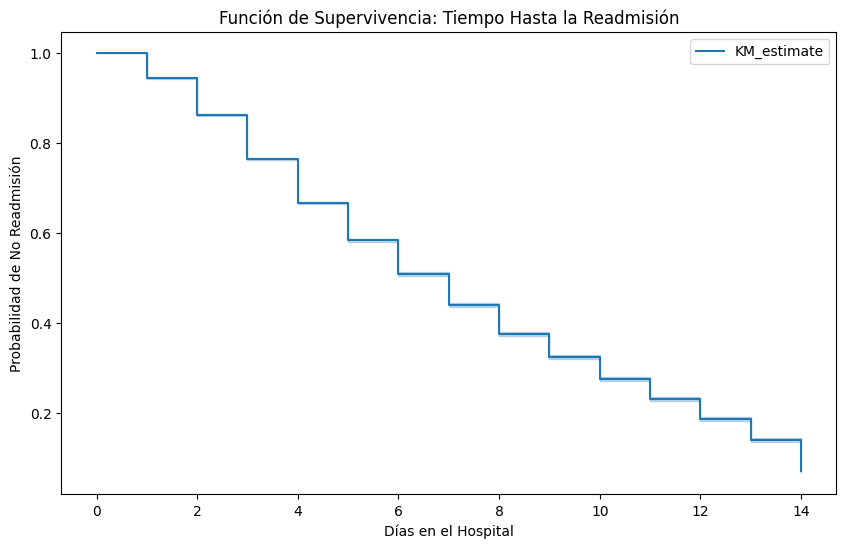

In [140]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=adapted_data['time_in_hospital'], event_observed=adapted_data['readmitted'])
print(f'Kaplan-Meier estimate: {kmf.median_survival_time_}')

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Función de Supervivencia: Tiempo Hasta la Readmisión')
plt.xlabel('Días en el Hospital')
plt.ylabel('Probabilidad de No Readmisión')
plt.show()

La visualización de la función de supervivencia, creada utilizando el estimador de Kaplan-Meier, ilustra la probabilidad de no readmisión a lo largo del tiempo, específicamente en días de hospitalización. La gráfica muestra que la probabilidad de que un paciente no sea readmitido disminuye con el aumento de los días en el hospital. Un aspecto notable es que la estimación de Kaplan-Meier revela que la mediana del tiempo hasta la readmisión es de 7 días, lo que sugiere que la mitad de los pacientes son readmitidos dentro de este período.

Esta visualización es fundamental para entender la dinámica de las readmisiones hospitalarias, ya que permite a los clínicos y analistas identificar períodos críticos en los que los pacientes son más propensos a ser readmitidos. Al observar cómo la probabilidad de no readmisión se reduce a medida que aumenta el tiempo en el hospital, los responsables de la atención médica pueden considerar intervenciones específicas para mejorar la atención durante estos días y reducir el riesgo de readmisiones. En conjunto, la gráfica proporciona una representación clara y accesible del comportamiento de las readmisiones, apoyando la toma de decisiones informadas en el manejo del paciente.

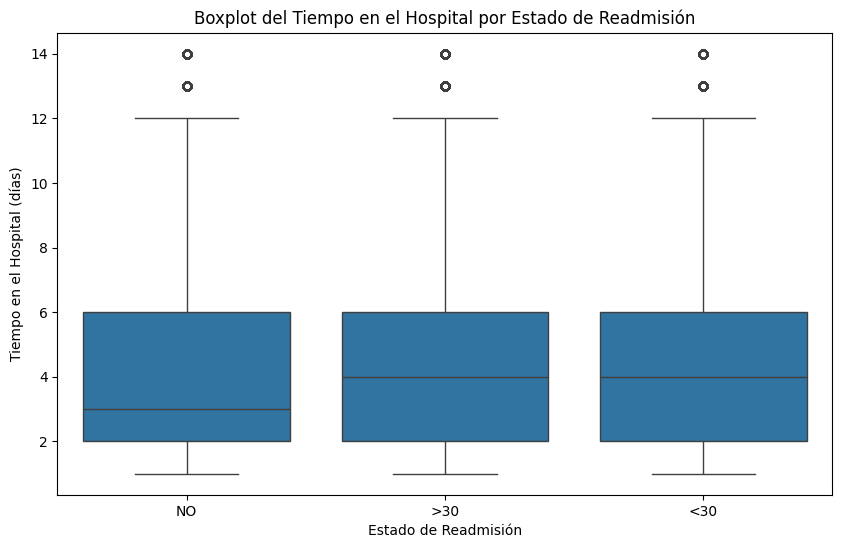

In [141]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=data)
plt.title('Boxplot del Tiempo en el Hospital por Estado de Readmisión')
plt.xlabel('Estado de Readmisión')
plt.ylabel('Tiempo en el Hospital (días)')
plt.show()

### **2.2. Visualizaciones Interactivas**
---

* Cree visualizaciones interactivas, como gráficos dinámicos o tableros interactivos y proporcione instrucciones claras sobre cómo interactuar con ellos.
* Explore cómo estas visualizaciones ayudan en la exploración de datos y documente su análisis.

In [142]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=len(one_hot_categorical), subplot_titles=one_hot_categorical)

for i, column_name in enumerate(one_hot_categorical):
  column = data[column_name]
  uniques = np.unique(column)

  for value in uniques:
    kmf = KaplanMeierFitter()
    kmf.fit(durations = adapted_data[data[column_name]==value]['time_in_hospital'], event_observed = adapted_data[data[column_name]==value]['readmitted'])
    times, prob = kmf.survival_function_.index, kmf.survival_function_.KM_estimate
    upper, lower = kmf.confidence_interval_['KM_estimate_upper_0.95'], kmf.confidence_interval_['KM_estimate_lower_0.95']

    fig.add_trace(go.Scatter(x=times, y=prob, name=f'{value}'),row=1, col=i+1)
    #fig.add_trace(go.Scatter(x=times, y=upper,fill=None,mode='lines'),row=1, col=i+1)
    #fig.add_trace(go.Scatter(x=times,y=lower,fill='tonexty', mode='lines'),row=1, col=i+1)
    fig['layout'][f'xaxis{i+1}']['title']='Time'
    fig['layout'][f'yaxis{i+1}']['title']='Surb prob'

fig.update_layout(height=500, width=3000, title_text="Kaplan Meier curves by feature")
fig.show()

En este caso, al observar las curvas de Kaplan-Meier para diferentes categorías de la variable, como el género o el tipo de tratamiento, se puede notar que todas las curvas tienden a descender. Esto sugiere que, independientemente de la categoría analizada, la probabilidad de no readmisión disminuye con el tiempo.
La visualización de datos permite no solo observar la tendencia general, sino también profundizar en cada categoría para evaluar diferencias sutiles en la dinámica de la readmisión.

### **2.3. Visualización de Mapas Coropléticos (Opcional)**
---

* Si aplica mapas coropléticos para representar datos geoespaciales, incluya estas visualizaciones.
* Explique la elección de este tipo de visualización y cómo ésta contribuye a la comprensión de patrones geográficos y a la solución planteada.

**No aplica**

### **2.4. Interpretación de Resultados**
---
* ¿Existen patrones o tendencias significativas en los datos?

Sí, se observa que la variable de readmisión y de tiempo_en_hospital pueden ser explicadas parcialmente por las demás variables de la base de datos. Especialmente, las variables que seleccionamos en el modelo de regresión mlineal múltiple.

* ¿Qué significan los resultados en términos prácticos?

Los resultados muestran que las variables objetivo elegidas se explican de forma significativa y en determinada proporción por las variables explicativas elegidas.

* ¿Existen patrones o tendencias inesperadas en los datos que requieran una consideración especial o una investigación adicional?

No identificamos patrones o tendencias inesperadas en los datos,  una vez fueron filtradas todas las variables no deseadas y se realizó el proceso de manipulación de las variables.

* ¿Cuáles fueron los hallazgos principales que contribuirán al proceso de toma de decisiones?

A partir del conocimiento de la imfluencia significativa de las variables elegidas, y del efecto positivbo o negativo sobre la variable objetivo, los doctores y hacedores de políticas públicas podrán manejar mejor los tratamientos y cuidado de los pacientes de hospitales.

Recuerde que la interpretación de resultados es una fase clave para extraer el significado de los datos y proporcionar respuestas o soluciones al problema inicial.

## **3. Conclusiones**
---
Asegúrese de incluir al menos una conclusión de cada unidad tratada en los *notebooks*. Estas conclusiones actúan como resúmenes breves que destacan los puntos clave y los aprendizajes esenciales de cada sección.


1.   Los datos son representativos de una población pues muestran información de una encuesta lo suficientemente grande.
2.   Las variables estan completas en su gran mayoría y tiene valores lógicos que pueden ser útiles a la hora de interpretarlos.
3.   La reasignación de valores a algunas variables puede ser muy útil a la hora de hacer una análisis profundo, y también puede eliminar redundancia en ellas.
4.   Las variables de readmisión y tiempó_en_hospital pueden explicarse significativamente por las variables explicativas seleccionadas.



## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*